In [11]:
%load_ext autoreload
%autoreload 2

In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sys
from pathlib import Path
sys.path.append(str(Path.cwd().parents[1]))
from evaluate_oversampler_cross_val import cross_validation
from handle_results import HandleResults
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_curve, plot_precision_recall_curve, auc
from sklearn.model_selection import StratifiedKFold

# oversamplers
from imblearn.over_sampling import RandomOverSampler, SMOTE, SMOTENC, SVMSMOTE, ADASYN, BorderlineSMOTE
from sv_synthsonic import synthsonic
import smote_variants as sv

# classifiers
from xgboost.sklearn import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

In [2]:
datafolder = Path.cwd().parents[1] / 'Datasets'
df = pd.read_csv(datafolder.joinpath('credit_default.csv'))
X = df.iloc[:,:-1].values
y = df.iloc[:,-1].values
title = 'Credit_default'
random_state=5
oversamplers = [RandomOverSampler(random_state=random_state), 
                SMOTE(random_state=random_state, n_jobs=-1),
                SMOTENC(categorical_features=[],random_state=random_state),
                SVMSMOTE(random_state=random_state, n_jobs=-1), 
                ADASYN(random_state=random_state, n_jobs=-1), 
                BorderlineSMOTE(random_state=random_state, n_jobs=-1),
                synthsonic(distinct_threshold=20),
                sv.polynom_fit_SMOTE(random_state=random_state),
                sv.Random_SMOTE(random_state=random_state),
                sv.NoSMOTE()]
proportions = np.array([0.2, 0.4, 0.6, 0.8, 1.])
cv = cross_validation()

In [4]:
res = cv.loop_over_oversamplers(X,y,title, oversamplers, proportions)
respath = Path.cwd().parents[1] / 'CSV_results' / 'Cross_validation'
res.to_csv(respath.joinpath('cross_validation_credit_default.csv'))

oversampler:  60%|██████    | 6/10 [09:05<05:59, 89.87s/it] 2021-07-30 14:53:51,262:INFO:synthsonic: Running sampling via ('synthsonic', "{'proportion': 0.4, 'distinct_threshold': 20, 'do_PCA': True, 'ordering': 'pca'}")
2021-07-30 14:53:51,262:INFO:synthsonic: Running sampling via ('synthsonic', "{'proportion': 0.4, 'distinct_threshold': 20, 'do_PCA': True, 'ordering': 'pca'}")

  0%|          | 0/253.0 [00:00<?, ?it/s]
Building tree:   0%|          | 0/253.0 [00:00<?, ?it/s]
Building tree:  28%|██▊       | 72/253.0 [00:00<00:00, 401.30it/s]
Building tree:  52%|█████▏    | 132/253.0 [00:00<00:00, 467.62it/s]
Building tree:  76%|███████▌  | 192/253.0 [00:00<00:00, 506.56it/s]
Building tree: 100%|██████████| 253/253.0 [00:00<00:00, 477.71it/s]

Generating for node: 22:  29%|██▉       | 7/24 [00:02<00:06,  2.44it/s]/Users/tristenmarto/anaconda3/lib/python3.7/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:522: UserWarning: Found unknown state name. Trying to switch to using all st

Generating for node: 22:  33%|███▎      | 8/24 [00:03<00:06,  2.42it/s]/Users/tristenmarto/anaconda3/lib/python3.7/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:522: UserWarning: Found unknown state name. Trying to switch to using all state names as state numbers
  "Found unknown state name. Trying to switch to using all state names as state numbers"

Generating for node: 6: 100%|██████████| 24/24 [00:09<00:00,  2.43it/s]

Generating for node: 6: 100%|██████████| 24/24 [00:02<00:00, 11.31it/s]
2021-07-30 14:54:32,856:INFO:synthsonic: Running sampling via ('synthsonic', "{'proportion': 0.4, 'distinct_threshold': 20, 'do_PCA': True, 'ordering': 'pca'}")
2021-07-30 14:54:32,856:INFO:synthsonic: Running sampling via ('synthsonic', "{'proportion': 0.4, 'distinct_threshold': 20, 'do_PCA': True, 'ordering': 'pca'}")

  0%|          | 0/253.0 [00:00<?, ?it/s]
Building tree:   0%|          | 0/253.0 [00:00<?, ?it/s]
Building tree:  33%|███▎      | 84/253.0 [00:00<00:00, 723.63it/s]
Bui

Generating for node: 10:  79%|███████▉  | 19/24 [00:08<00:02,  2.43it/s]/Users/tristenmarto/anaconda3/lib/python3.7/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:522: UserWarning: Found unknown state name. Trying to switch to using all state names as state numbers
  "Found unknown state name. Trying to switch to using all state names as state numbers"

Generating for node: 6: 100%|██████████| 24/24 [00:09<00:00,  2.43it/s]

Generating for node: 6: 100%|██████████| 24/24 [00:02<00:00, 10.85it/s]
2021-07-30 14:54:53,379:INFO:synthsonic: Running sampling via ('synthsonic', "{'proportion': 0.4, 'distinct_threshold': 20, 'do_PCA': True, 'ordering': 'pca'}")
2021-07-30 14:54:53,379:INFO:synthsonic: Running sampling via ('synthsonic', "{'proportion': 0.4, 'distinct_threshold': 20, 'do_PCA': True, 'ordering': 'pca'}")

  0%|          | 0/253.0 [00:00<?, ?it/s]
Building tree:   0%|          | 0/253.0 [00:00<?, ?it/s]
Building tree:  33%|███▎      | 84/253.0 [00:00<00:00, 735.55it/s]
Bu

Generating for node: 10:  79%|███████▉  | 19/24 [00:08<00:01,  2.51it/s]/Users/tristenmarto/anaconda3/lib/python3.7/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:522: UserWarning: Found unknown state name. Trying to switch to using all state names as state numbers
  "Found unknown state name. Trying to switch to using all state names as state numbers"

Generating for node: 6: 100%|██████████| 24/24 [00:09<00:00,  2.47it/s]

Generating for node: 6: 100%|██████████| 24/24 [00:02<00:00, 10.93it/s]
2021-07-30 14:55:13,705:INFO:synthsonic: Running sampling via ('synthsonic', "{'proportion': 0.6, 'distinct_threshold': 20, 'do_PCA': True, 'ordering': 'pca'}")
2021-07-30 14:55:13,705:INFO:synthsonic: Running sampling via ('synthsonic', "{'proportion': 0.6, 'distinct_threshold': 20, 'do_PCA': True, 'ordering': 'pca'}")

  0%|          | 0/253.0 [00:00<?, ?it/s]
Building tree:   0%|          | 0/253.0 [00:00<?, ?it/s]
Building tree:  33%|███▎      | 84/253.0 [00:00<00:00, 735.13it/s]
Bu

Generating for node: 6: 100%|██████████| 24/24 [00:09<00:00,  2.47it/s]

Generating for node: 6: 100%|██████████| 24/24 [00:02<00:00, 11.14it/s]
2021-07-30 14:55:34,336:INFO:synthsonic: Running sampling via ('synthsonic', "{'proportion': 0.6, 'distinct_threshold': 20, 'do_PCA': True, 'ordering': 'pca'}")
2021-07-30 14:55:34,336:INFO:synthsonic: Running sampling via ('synthsonic', "{'proportion': 0.6, 'distinct_threshold': 20, 'do_PCA': True, 'ordering': 'pca'}")

  0%|          | 0/253.0 [00:00<?, ?it/s]
Building tree:   0%|          | 0/253.0 [00:00<?, ?it/s]
Building tree:  29%|██▉       | 73/253.0 [00:00<00:00, 729.53it/s]
Building tree:  58%|█████▊    | 146/253.0 [00:00<00:00, 627.40it/s]
Building tree: 100%|██████████| 253/253.0 [00:00<00:00, 588.01it/s]

Generating for node: 22:  33%|███▎      | 8/24 [00:03<00:06,  2.49it/s]/Users/tristenmarto/anaconda3/lib/python3.7/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:522: UserWarning: Found unknown state name. Trying to switc

Generating for node: 6: 100%|██████████| 24/24 [00:09<00:00,  2.48it/s]

Generating for node: 6: 100%|██████████| 24/24 [00:02<00:00, 10.95it/s]
2021-07-30 14:55:54,930:INFO:synthsonic: Running sampling via ('synthsonic', "{'proportion': 0.6, 'distinct_threshold': 20, 'do_PCA': True, 'ordering': 'pca'}")
2021-07-30 14:55:54,930:INFO:synthsonic: Running sampling via ('synthsonic', "{'proportion': 0.6, 'distinct_threshold': 20, 'do_PCA': True, 'ordering': 'pca'}")

  0%|          | 0/253.0 [00:00<?, ?it/s]
Building tree:   0%|          | 0/253.0 [00:00<?, ?it/s]
Building tree:  33%|███▎      | 84/253.0 [00:00<00:00, 764.05it/s]
Building tree:  64%|██████▎   | 161/253.0 [00:00<00:00, 671.47it/s]
Building tree: 100%|██████████| 253/253.0 [00:00<00:00, 621.41it/s]

Generating for node: 10:  79%|███████▉  | 19/24 [00:08<00:02,  2.44it/s]/Users/tristenmarto/anaconda3/lib/python3.7/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:522: UserWarning: Found unknown state name. Trying to swit

Generating for node: 6: 100%|██████████| 24/24 [00:02<00:00, 10.83it/s]
2021-07-30 14:56:15,741:INFO:synthsonic: Running sampling via ('synthsonic', "{'proportion': 0.6, 'distinct_threshold': 20, 'do_PCA': True, 'ordering': 'pca'}")
2021-07-30 14:56:15,741:INFO:synthsonic: Running sampling via ('synthsonic', "{'proportion': 0.6, 'distinct_threshold': 20, 'do_PCA': True, 'ordering': 'pca'}")

  0%|          | 0/253.0 [00:00<?, ?it/s]
Building tree:   0%|          | 0/253.0 [00:00<?, ?it/s]
Building tree:  33%|███▎      | 84/253.0 [00:00<00:00, 707.44it/s]
Building tree:  62%|██████▏   | 156/253.0 [00:00<00:00, 656.73it/s]
Building tree: 100%|██████████| 253/253.0 [00:00<00:00, 615.10it/s]

Generating for node: 10:  79%|███████▉  | 19/24 [00:08<00:02,  2.47it/s]/Users/tristenmarto/anaconda3/lib/python3.7/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:522: UserWarning: Found unknown state name. Trying to switch to using all state names as state numbers
  "Found unknown state name.

Generating for node: 6: 100%|██████████| 24/24 [00:02<00:00, 10.51it/s]
2021-07-30 14:56:36,347:INFO:synthsonic: Running sampling via ('synthsonic', "{'proportion': 0.8, 'distinct_threshold': 20, 'do_PCA': True, 'ordering': 'pca'}")
2021-07-30 14:56:36,347:INFO:synthsonic: Running sampling via ('synthsonic', "{'proportion': 0.8, 'distinct_threshold': 20, 'do_PCA': True, 'ordering': 'pca'}")

  0%|          | 0/253.0 [00:00<?, ?it/s]
Building tree:   0%|          | 0/253.0 [00:00<?, ?it/s]
Building tree:  28%|██▊       | 72/253.0 [00:00<00:00, 697.11it/s]
Building tree:  56%|█████▌    | 142/253.0 [00:00<00:00, 660.24it/s]
Building tree: 100%|██████████| 253/253.0 [00:00<00:00, 577.44it/s]

Generating for node: 22:  29%|██▉       | 7/24 [00:02<00:07,  2.41it/s]/Users/tristenmarto/anaconda3/lib/python3.7/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:522: UserWarning: Found unknown state name. Trying to switch to using all state names as state numbers
  "Found unknown state name. 

Generating for node: 6: 100%|██████████| 24/24 [00:02<00:00, 10.67it/s]
2021-07-30 14:56:57,350:INFO:synthsonic: Running sampling via ('synthsonic', "{'proportion': 0.8, 'distinct_threshold': 20, 'do_PCA': True, 'ordering': 'pca'}")
2021-07-30 14:56:57,350:INFO:synthsonic: Running sampling via ('synthsonic', "{'proportion': 0.8, 'distinct_threshold': 20, 'do_PCA': True, 'ordering': 'pca'}")

  0%|          | 0/253.0 [00:00<?, ?it/s]
Building tree:   0%|          | 0/253.0 [00:00<?, ?it/s]
Building tree:  33%|███▎      | 84/253.0 [00:00<00:00, 714.99it/s]
Building tree:  62%|██████▏   | 156/253.0 [00:00<00:00, 627.13it/s]
Building tree: 100%|██████████| 253/253.0 [00:00<00:00, 588.98it/s]

Generating for node: 22:  33%|███▎      | 8/24 [00:03<00:06,  2.49it/s]/Users/tristenmarto/anaconda3/lib/python3.7/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:522: UserWarning: Found unknown state name. Trying to switch to using all state names as state numbers
  "Found unknown state name. 

2021-07-30 14:57:17,977:INFO:synthsonic: Running sampling via ('synthsonic', "{'proportion': 0.8, 'distinct_threshold': 20, 'do_PCA': True, 'ordering': 'pca'}")

  0%|          | 0/253.0 [00:00<?, ?it/s]
Building tree:   0%|          | 0/253.0 [00:00<?, ?it/s]
Building tree:  28%|██▊       | 72/253.0 [00:00<00:00, 711.15it/s]
Building tree:  57%|█████▋    | 144/253.0 [00:00<00:00, 629.15it/s]
Building tree: 100%|██████████| 253/253.0 [00:00<00:00, 578.38it/s]

Generating for node: 10:  79%|███████▉  | 19/24 [00:08<00:02,  2.45it/s]/Users/tristenmarto/anaconda3/lib/python3.7/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:522: UserWarning: Found unknown state name. Trying to switch to using all state names as state numbers
  "Found unknown state name. Trying to switch to using all state names as state numbers"

Generating for node: 6: 100%|██████████| 24/24 [00:09<00:00,  2.41it/s]

Generating for node: 6: 100%|██████████| 24/24 [00:02<00:00, 10.39it/s]
2021-07-30 14:57:38,998:IN

Generating for node: 10:  79%|███████▉  | 19/24 [00:08<00:02,  2.49it/s]/Users/tristenmarto/anaconda3/lib/python3.7/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:522: UserWarning: Found unknown state name. Trying to switch to using all state names as state numbers
  "Found unknown state name. Trying to switch to using all state names as state numbers"

Generating for node: 6: 100%|██████████| 24/24 [00:09<00:00,  2.43it/s]

Generating for node: 6: 100%|██████████| 24/24 [00:02<00:00, 10.42it/s]
2021-07-30 14:58:00,039:INFO:synthsonic: Running sampling via ('synthsonic', "{'proportion': 1.0, 'distinct_threshold': 20, 'do_PCA': True, 'ordering': 'pca'}")
2021-07-30 14:58:00,039:INFO:synthsonic: Running sampling via ('synthsonic', "{'proportion': 1.0, 'distinct_threshold': 20, 'do_PCA': True, 'ordering': 'pca'}")

  0%|          | 0/253.0 [00:00<?, ?it/s]
Building tree:   0%|          | 0/253.0 [00:00<?, ?it/s]
Building tree:  30%|██▉       | 75/253.0 [00:00<00:00, 749.80it/s]
Bu

Generating for node: 22:  29%|██▉       | 7/24 [00:02<00:07,  2.39it/s]/Users/tristenmarto/anaconda3/lib/python3.7/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:522: UserWarning: Found unknown state name. Trying to switch to using all state names as state numbers
  "Found unknown state name. Trying to switch to using all state names as state numbers"

Generating for node: 6: 100%|██████████| 24/24 [00:09<00:00,  2.42it/s]

Generating for node: 6: 100%|██████████| 24/24 [00:02<00:00, 10.38it/s]
2021-07-30 14:58:21,365:INFO:synthsonic: Running sampling via ('synthsonic', "{'proportion': 1.0, 'distinct_threshold': 20, 'do_PCA': True, 'ordering': 'pca'}")
2021-07-30 14:58:21,365:INFO:synthsonic: Running sampling via ('synthsonic', "{'proportion': 1.0, 'distinct_threshold': 20, 'do_PCA': True, 'ordering': 'pca'}")

  0%|          | 0/253.0 [00:00<?, ?it/s]
Building tree:   0%|          | 0/253.0 [00:00<?, ?it/s]
Building tree:  33%|███▎      | 84/253.0 [00:00<00:00, 711.88it/s]
Bui

Generating for node: 6: 100%|██████████| 24/24 [00:09<00:00,  2.45it/s]

Generating for node: 6: 100%|██████████| 24/24 [00:02<00:00, 10.47it/s]
2021-07-30 14:58:42,598:INFO:synthsonic: Running sampling via ('synthsonic', "{'proportion': 1.0, 'distinct_threshold': 20, 'do_PCA': True, 'ordering': 'pca'}")
2021-07-30 14:58:42,598:INFO:synthsonic: Running sampling via ('synthsonic', "{'proportion': 1.0, 'distinct_threshold': 20, 'do_PCA': True, 'ordering': 'pca'}")

  0%|          | 0/253.0 [00:00<?, ?it/s]
Building tree:   0%|          | 0/253.0 [00:00<?, ?it/s]
Building tree:  28%|██▊       | 72/253.0 [00:00<00:00, 719.75it/s]
Building tree:  57%|█████▋    | 144/253.0 [00:00<00:00, 596.00it/s]
Building tree: 100%|██████████| 253/253.0 [00:00<00:00, 571.16it/s]

Generating for node: 2:  62%|██████▎   | 15/24 [00:06<00:04,  2.03it/s] 


Generating for node: 10:  79%|███████▉  | 19/24 [00:08<00:02,  2.42it/s]/Users/tristenmarto/anaconda3/lib/python3.7/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:522: UserWarning: Found unknown state name. Trying to switch to using all state names as state numbers
  "Found unknown state name. Trying to switch to using all state names as state numbers"

Generating for node: 6: 100%|██████████| 24/24 [00:09<00:00,  2.41it/s]

Generating for node: 6: 100%|██████████| 24/24 [00:02<00:00,  9.91it/s]
2021-07-30 14:59:04,122:INFO:synthsonic: Running sampling via ('synthsonic', "{'proportion': 1.0, 'distinct_threshold': 20, 'do_PCA': True, 'ordering': 'pca'}")
2021-07-30 14:59:04,122:INFO:synthsonic: Running sampling via ('synthsonic', "{'proportion': 1.0, 'distinct_threshold': 20, 'do_PCA': True, 'ordering': 'pca'}")

  0%|          | 0/253.0 [00:00<?, ?it/s]
Building tree:   0%|          | 0/253.0 [00:00<?, ?it/s]
Building tree:  33%|███▎      | 84/253.0 [00:00<00:00, 734.79it/s]
Bu


Generating for node: 6: 100%|██████████| 24/24 [00:10<00:00,  2.37it/s]

oversampler:  70%|███████   | 7/10 [14:40<08:29, 169.81s/it]2021-07-30 14:59:25,653:INFO:polynom_fit_SMOTE: Running sampling via ('polynom_fit_SMOTE', "{'proportion': 0.4, 'topology': 'star', 'random_state': 5}")
2021-07-30 14:59:25,653:INFO:polynom_fit_SMOTE: Running sampling via ('polynom_fit_SMOTE', "{'proportion': 0.4, 'topology': 'star', 'random_state': 5}")
2021-07-30 14:59:27,372:INFO:polynom_fit_SMOTE: Running sampling via ('polynom_fit_SMOTE', "{'proportion': 0.4, 'topology': 'star', 'random_state': 5}")
2021-07-30 14:59:27,372:INFO:polynom_fit_SMOTE: Running sampling via ('polynom_fit_SMOTE', "{'proportion': 0.4, 'topology': 'star', 'random_state': 5}")
2021-07-30 14:59:29,230:INFO:polynom_fit_SMOTE: Running sampling via ('polynom_fit_SMOTE', "{'proportion': 0.4, 'topology': 'star', 'random_state': 5}")
2021-07-30 14:59:29,230:INFO:polynom_fit_SMOTE: Running sampling via ('polynom_fit_SMOTE', "{'proport

2021-07-30 14:59:59,117:INFO:polynom_fit_SMOTE: Running sampling via ('polynom_fit_SMOTE', "{'proportion': 1.0, 'topology': 'star', 'random_state': 5}")
2021-07-30 14:59:59,117:INFO:polynom_fit_SMOTE: Running sampling via ('polynom_fit_SMOTE', "{'proportion': 1.0, 'topology': 'star', 'random_state': 5}")
oversampler:  80%|████████  | 8/10 [15:16<04:14, 127.18s/it]2021-07-30 15:00:01,561:INFO:Random_SMOTE: Running sampling via ('Random_SMOTE', "{'proportion': 0.4, 'n_neighbors': 5, 'n_jobs': 1, 'random_state': 5}")
2021-07-30 15:00:01,561:INFO:Random_SMOTE: Running sampling via ('Random_SMOTE', "{'proportion': 0.4, 'n_neighbors': 5, 'n_jobs': 1, 'random_state': 5}")
2021-07-30 15:00:03,898:INFO:Random_SMOTE: Running sampling via ('Random_SMOTE', "{'proportion': 0.4, 'n_neighbors': 5, 'n_jobs': 1, 'random_state': 5}")
2021-07-30 15:00:03,898:INFO:Random_SMOTE: Running sampling via ('Random_SMOTE', "{'proportion': 0.4, 'n_neighbors': 5, 'n_jobs': 1, 'random_state': 5}")
2021-07-30 15:00:0

In [31]:
res = res.reset_index(drop=True)
a = res.oversampler.unique()
b = ['RandomOverSampler', 
     'SMOTE', 
     'SMOTENC', 
     'SVMSMOTE', 
     'ADASYN', 
     'BorderlineSMOTE', 
     'synthsonic', 
     'polynom_fit_SMOTE',
     'Random_SMOTE',
     'NoSMOTE']

for old, new in zip(a,b) :
    res.loc[res.oversampler == old, 'oversampler'] = new

In [32]:
hr = HandleResults()
hr.final_ranking(res, 'f1')

,proportion,f1,f1_std
oversampler,,,
RandomOverSampler,1.0,0.523250,0.007083
SVMSMOTE,1.0,0.492408,0.004531
SMOTE,0.4,0.487178,0.007021
BorderlineSMOTE,0.6,0.482535,0.001140
synthsonic,0.8,0.480965,0.006651
SMOTENC,0.4,0.480239,0.007350
ADASYN,0.6,0.477368,0.003631
polynom_fit_SMOTE,1.0,0.470108,0.007980
Random_SMOTE,1.0,0.469640,0.008852


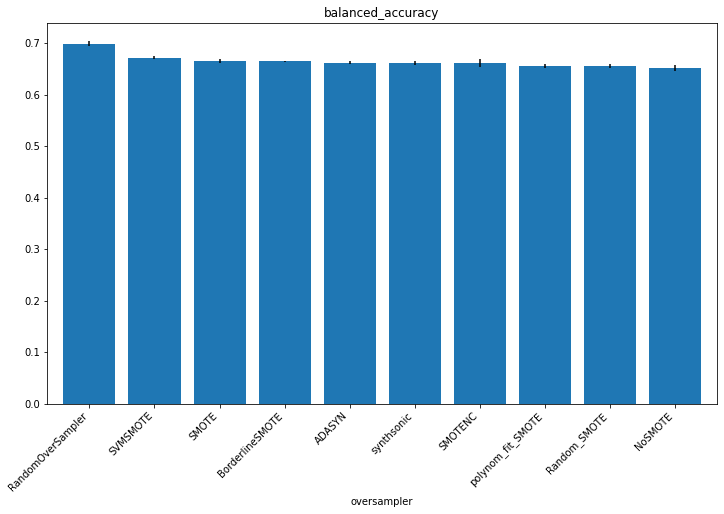

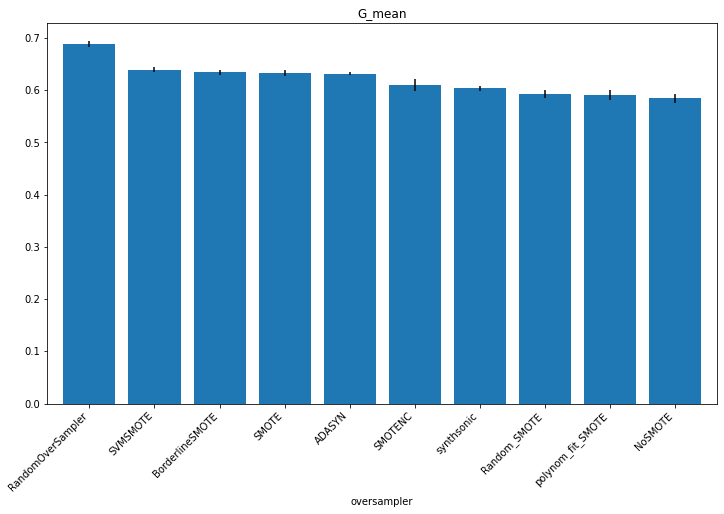

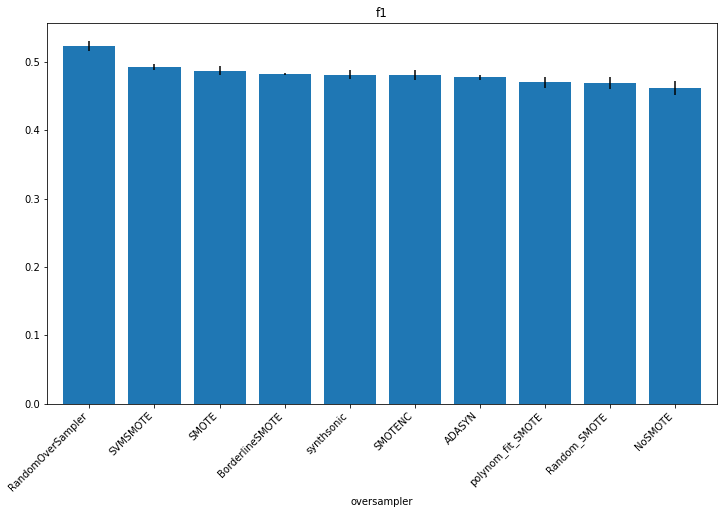

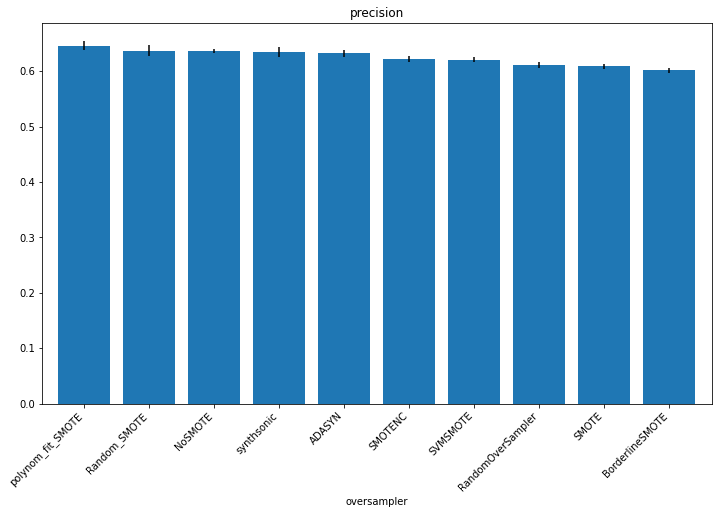

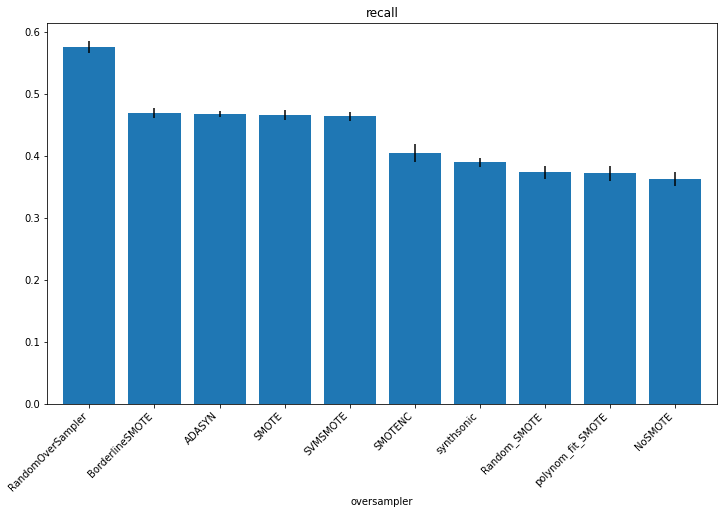

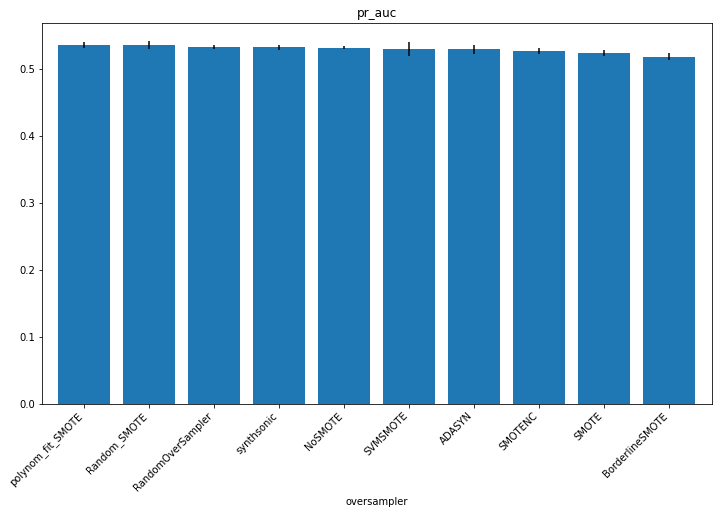

In [33]:
metrics = ['balanced_accuracy', 'G_mean', 'f1', 'precision', 'recall', 'pr_auc']

for i in metrics :
    hr.plot_bar_metric(res, i)

In [42]:
hr.select_best(res, 'pr_auc')

,dataset,oversampler,proportion,balanced_accuracy,balanced_accuracy_std,G_mean,G_mean_std,f1,f1_std,precision,precision_std,recall,recall_std,pr_auc,pr_auc_std,runtime,runtime_std
31,Credit_default,polynom_fit_SMOTE,1.0,0.656009,0.004056,0.590104,0.006294,0.470108,0.007980,0.646091,0.008159,0.369500,0.007707,0.536391,0.004960,0.098199,0.001705
34,Credit_default,Random_SMOTE,0.8,0.654842,0.006744,0.589242,0.010534,0.467609,0.013104,0.637280,0.010325,0.369349,0.013070,0.535959,0.006064,0.794871,0.018563
1,Credit_default,RandomOverSampler,0.6,0.683421,0.003752,0.651610,0.004830,0.511497,0.006151,0.550887,0.006805,0.477396,0.006833,0.533411,0.003183,0.009225,0.000591
25,Credit_default,synthsonic,0.6,0.660699,0.003757,0.600447,0.006780,0.478499,0.006918,0.631953,0.009092,0.385172,0.009747,0.532656,0.003271,19.044809,0.101993
36,Credit_default,NoSMOTE,0.4,0.651869,0.004998,0.583994,0.008946,0.461856,0.009704,0.636925,0.003388,0.362417,0.011799,0.532317,0.002738,0.003428,0.000262
12,Credit_default,SVMSMOTE,0.4,0.665668,0.004598,0.610669,0.007445,0.487113,0.008395,0.620877,0.004274,0.400844,0.010149,0.530361,0.010026,19.727399,0.317717
16,Credit_default,ADASYN,0.4,0.659675,0.005841,0.598585,0.009566,0.476571,0.011106,0.631995,0.006903,0.382610,0.012495,0.529491,0.007217,0.254063,0.002267
8,Credit_default,SMOTENC,0.4,0.661830,0.003971,0.603922,0.006684,0.480239,0.007350,0.621957,0.004578,0.391200,0.009132,0.527715,0.004264,2.742331,0.033176
4,Credit_default,SMOTE,0.4,0.666005,0.003866,0.613237,0.005991,0.487178,0.007021,0.608421,0.005338,0.406269,0.008087,0.524723,0.004390,0.158323,0.007926
20,Credit_default,BorderlineSMOTE,0.4,0.663458,0.004455,0.609936,0.007025,0.482379,0.008034,0.601932,0.004447,0.402502,0.009572,0.518742,0.005348,0.351865,0.004392


2021-07-30 15:52:14,953:INFO:synthsonic: Running sampling via ('synthsonic', "{'proportion': 0.6, 'distinct_threshold': -1, 'do_PCA': True, 'ordering': 'pca'}")
2021-07-30 15:52:14,953:INFO:synthsonic: Running sampling via ('synthsonic', "{'proportion': 0.6, 'distinct_threshold': -1, 'do_PCA': True, 'ordering': 'pca'}")
Building tree: 100%|██████████| 253/253.0 [00:00<00:00, 631.04it/s]
Generating for node: 15: 100%|██████████| 24/24 [00:02<00:00, 10.50it/s]
2021-07-30 15:52:37,319:INFO:synthsonic: Running sampling via ('synthsonic', "{'proportion': 0.6, 'distinct_threshold': -1, 'do_PCA': True, 'ordering': 'pca'}")
2021-07-30 15:52:37,319:INFO:synthsonic: Running sampling via ('synthsonic', "{'proportion': 0.6, 'distinct_threshold': -1, 'do_PCA': True, 'ordering': 'pca'}")
Building tree: 100%|██████████| 253/253.0 [00:00<00:00, 660.98it/s]
Generating for node: 11: 100%|██████████| 24/24 [00:02<00:00,  9.72it/s]
2021-07-30 15:52:59,584:INFO:synthsonic: Running sampling via ('synthsonic

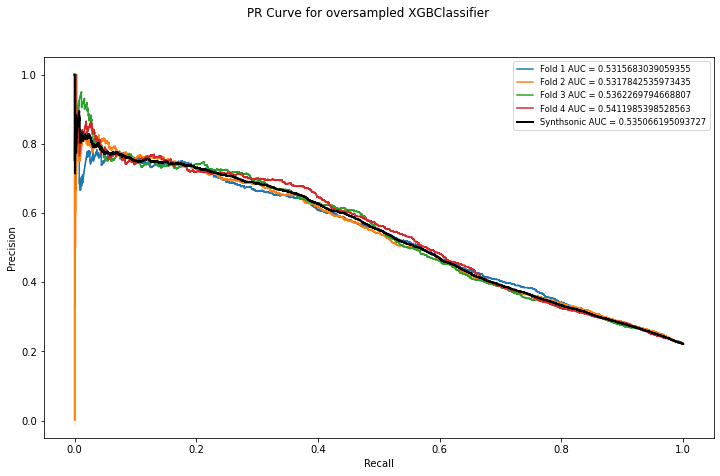

In [47]:
clf = XGBClassifier(verbosity=0, use_label_encoder=False)
over = synthsonic(proportion=0.6)
k_fold = StratifiedKFold(n_splits=4, shuffle=True, random_state=5)

# make plots
f, axes = plt.subplots(figsize=(12, 7))
f.suptitle(f"PR Curve for oversampled XGBClassifier")

# do kfold cross val and plot the PR curves
y_real = []
y_proba = []
for i, (train_index, test_index) in enumerate(k_fold.split(X,y), 1):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]    

    X_g, y_g = cv.generate_from_oversampler(over, X_train, y_train)
    
    clf.fit(X_g, y_g)
    probas = clf.predict_proba(X_test)
    precision, recall, _ = precision_recall_curve(y_test, probas[:,1])
    lab = f"Fold {i} AUC = {auc(recall, precision)}"
    axes.step(recall, precision, label=lab)
    y_real.append(y_test)
    y_proba.append(probas[:,1])

y_real = np.concatenate(y_real)
y_proba = np.concatenate(y_proba)
precision_synth, recall_synth, _ = precision_recall_curve(y_real, y_proba)
lab_synth = f"Synthsonic AUC = {auc(recall_synth, precision_synth)}"
axes.step(recall_synth, precision_synth, label=lab_synth, lw=2, color='black')
axes.set_xlabel('Recall')
axes.set_ylabel('Precision')
axes.legend(fontsize='small')

2021-07-30 15:58:26,838:INFO:NoSMOTE: Running sampling via ('NoSMOTE', '{}')
2021-07-30 15:58:26,838:INFO:NoSMOTE: Running sampling via ('NoSMOTE', '{}')
2021-07-30 15:58:28,026:INFO:NoSMOTE: Running sampling via ('NoSMOTE', '{}')
2021-07-30 15:58:28,026:INFO:NoSMOTE: Running sampling via ('NoSMOTE', '{}')
2021-07-30 15:58:29,127:INFO:NoSMOTE: Running sampling via ('NoSMOTE', '{}')
2021-07-30 15:58:29,127:INFO:NoSMOTE: Running sampling via ('NoSMOTE', '{}')
2021-07-30 15:58:30,331:INFO:NoSMOTE: Running sampling via ('NoSMOTE', '{}')
2021-07-30 15:58:30,331:INFO:NoSMOTE: Running sampling via ('NoSMOTE', '{}')


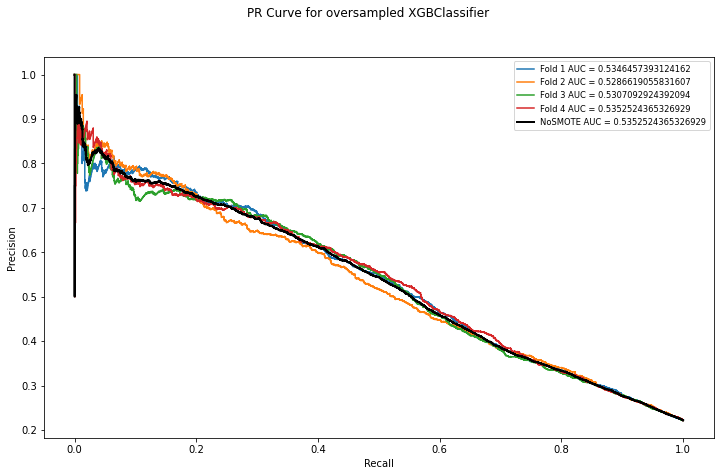

In [56]:
over = sv.NoSMOTE()

# make plots
f, axes = plt.subplots(figsize=(12, 7))
f.suptitle(f"PR Curve for oversampled XGBClassifier")

y_real = []
y_proba = []
for i, (train_index, test_index) in enumerate(k_fold.split(X,y), 1):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]    

    X_g, y_g = cv.generate_from_oversampler(over, X_train, y_train)
    
    clf.fit(X_g, y_g)
    probas = clf.predict_proba(X_test)
    precision, recall, _ = precision_recall_curve(y_test, probas[:,1])
    lab = f"Fold {i} AUC = {auc(recall, precision)}"
    axes.step(recall, precision, label=lab)
    y_real.append(y_test)
    y_proba.append(probas[:,1])

y_real = np.concatenate(y_real)
y_proba = np.concatenate(y_proba)
precision_NoSMOTE, recall_NoSMOTE, _ = precision_recall_curve(y_real, y_proba)
lab_NoSMOTE = f"NoSMOTE AUC = {auc(recall, precision)}"
axes.step(recall_NoSMOTE, precision_NoSMOTE, label=lab_NoSMOTE, lw=2, color='black')
axes.set_xlabel('Recall')
axes.set_ylabel('Precision')
axes.legend(fontsize='small')

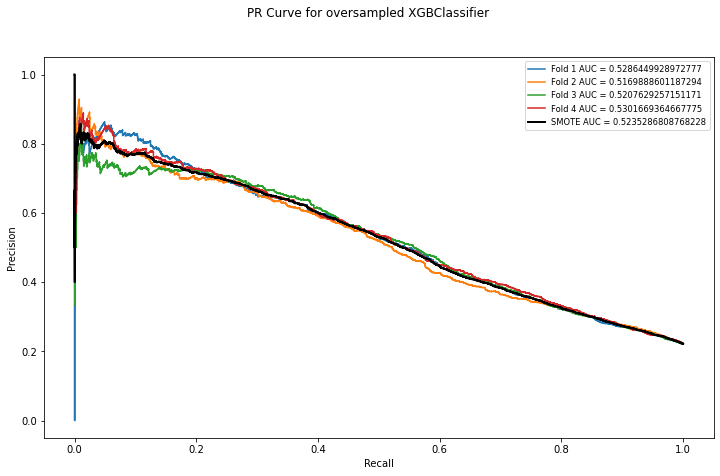

In [59]:
over = SMOTE(sampling_strategy=0.4)

# make plots
f, axes = plt.subplots(figsize=(12, 7))
f.suptitle(f"PR Curve for oversampled XGBClassifier")

y_real = []
y_proba = []
for i, (train_index, test_index) in enumerate(k_fold.split(X,y), 1):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]    

    X_g, y_g = cv.generate_from_oversampler(over, X_train, y_train)
    
    clf.fit(X_g, y_g)
    probas = clf.predict_proba(X_test)
    precision, recall, _ = precision_recall_curve(y_test, probas[:,1])
    lab = f"Fold {i} AUC = {auc(recall, precision)}"
    axes.step(recall, precision, label=lab)
    y_real.append(y_test)
    y_proba.append(probas[:,1])

y_real = np.concatenate(y_real)
y_proba = np.concatenate(y_proba)
precision_SMOTE, recall_SMOTE, _ = precision_recall_curve(y_real, y_proba)
lab_SMOTE = f"SMOTE AUC = {auc(recall_SMOTE, precision_SMOTE)}"
axes.step(recall_SMOTE, precision_SMOTE, label=lab_SMOTE, lw=2, color='black')
axes.set_xlabel('Recall')
axes.set_ylabel('Precision')
axes.legend(fontsize='small')

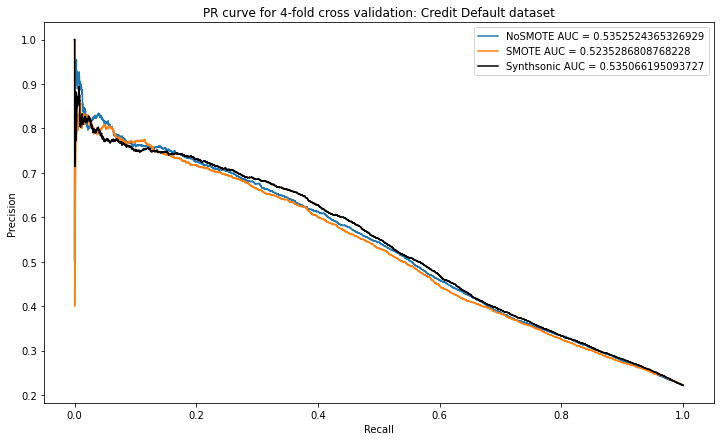

In [60]:
f, axes = plt.subplots(figsize=(12, 7))

axes.plot(recall_NoSMOTE, precision_NoSMOTE,label=lab_NoSMOTE)
axes.plot(recall_SMOTE, precision_SMOTE,label=lab_SMOTE)
axes.plot(recall_synth, precision_synth,label=lab_synth, color='black')

axes.set_title("PR curve for 4-fold cross validation: Credit Default dataset")
axes.set_xlabel("Recall")
axes.set_ylabel("Precision")
axes.legend()